In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import arabic_reshaper
from bidi.algorithm import get_display

In [16]:
df = pd.read_excel("Egyptian_Grocery_Transactions.xlsx", header = None)
df.head()

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"


In [17]:
df.columns = ['Items']

In [21]:
df.head(10)

,Items
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"
5,"شيبسي,فلفل,بيبسي,مياه"
6,"فراخ,بطاطس,شيبسي"
7,"طماطم,عدس,كورن فليكس"
8,"عسل,مربة,زيت,عيش بلدي"
9,"فراخ,مكرونة,شاي,كشري,سكر,سمنة"


In [25]:
# Initiate a list for storing list of records
records = []

# Storing dataset values
vals = df['Items'].values

# Looping through dataset and append each record to the list
for item in range(0, len(df)):
  records.append(vals[item].split(","))

# Printing results
records

[['سكر', 'لبن', 'شاي'],
 ['فراخ', 'بطاطس'],
 ['رز', 'فراخ'],
 ['عسل', 'لحمة', 'رز', 'زبادي'],
 ['بصل', 'رز', 'عدس'],
 ['شيبسي', 'فلفل', 'بيبسي', 'مياه'],
 ['فراخ', 'بطاطس', 'شيبسي'],
 ['طماطم', 'عدس', 'كورن فليكس'],
 ['عسل', 'مربة', 'زيت', 'عيش بلدي'],
 ['فراخ', 'مكرونة', 'شاي', 'كشري', 'سكر', 'سمنة'],
 ['عسل', 'عدس'],
 ['زيت', 'بيض', 'فول', 'مكرونة', 'صلصة', 'جبنة قريش'],
 ['شاي', 'عدس', 'عسل', 'زيت', 'بيبسي', 'بيض'],
 ['رز', 'عدس', 'كشري'],
 ['كشري', 'عيش بلدي'],
 ['لبن', 'بيبسي', 'مربة'],
 ['سكر', 'عيش بلدي', 'مكرونة'],
 ['بيبسي', 'زبادي', 'طعمية'],
 ['بيبسي', 'سكر', 'زيت', 'عدس', 'فول', 'بيض'],
 ['بيض', 'بيبسي', 'طعمية', 'سكر', 'سمنة', 'جبنة قريش']]

In [30]:
# Taking object from class
encoder = TransactionEncoder()

# Encoding records
records_encoded = encoder.fit_transform(records)

# Printing results
records_encoded[0]

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [34]:
# Transform encoded records to a dataframe
df_encoded = pd.DataFrame(records_encoded, columns = encoder.columns_, dtype = int)

# Printing results
df_encoded.head()

,بصل,بطاطس,بيبسي,بيض,جبنة قريش,رز,زبادي,زيت,سكر,سمنة,...,فراخ,فلفل,فول,كشري,كورن فليكس,لبن,لحمة,مربة,مكرونة,مياه
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Calculating support for each item
support = apriori(df_encoded, min_support = 0.1, use_colnames = True)

# Sorting by support
support.sort_values(by = 'support', ascending = False, inplace = True)

# Printing results
support.head(10)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.30,(بيبسي)
12,0.30,(عدس)
7,0.25,(سكر)
6,0.20,(زيت)
13,0.20,(عسل)
2,0.20,(بيض)
4,0.20,(رز)
15,0.20,(فراخ)
14,0.15,(عيش بلدي)
17,0.15,(كشري)


In [47]:
# Calculating confidence
confidence = association_rules(support, metric = 'confidence', min_threshold = 0.3)

# Sorting by confidence and lift
confidence.sort_values(by = ['confidence', 'lift'], ascending = False, inplace = True)

In [49]:
# Printing results
confidence.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
80,"(عدس, بيض)","(بيبسي, زيت)",0.1,0.1,0.1,1.0,10.0,1.0,0.09,inf,1.0,1.0,1.0,1.0
81,"(بيبسي, زيت)","(عدس, بيض)",0.1,0.1,0.1,1.0,10.0,1.0,0.09,inf,1.0,1.0,1.0,1.0


In [54]:
# Printing results
confidence.sample(4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
48,(بيبسي),"(سكر, بيض)",0.3,0.1,0.10,0.333333,3.333333,1.0,0.07,1.35,1.000000,0.333333,0.259259,0.666667
51,"(عدس, بيض)",(بيبسي),0.1,0.3,0.10,1.000000,3.333333,1.0,0.07,inf,0.777778,0.333333,1.000000,0.666667
2,(زيت),(بيض),0.2,0.2,0.15,0.750000,3.750000,1.0,0.11,3.20,0.916667,0.600000,0.687500,0.750000
60,(بيبسي),"(عدس, زيت)",0.3,0.1,0.10,0.333333,3.333333,1.0,0.07,1.35,1.000000,0.333333,0.259259,0.666667


# Strong Relationships

1. بيبسي, سكر, بيض: the lift is greater than 1 (3.33) also when the customer buys بيبسي there is a chance of 33.33% that he buys سكر, بيض.

2. عدس, بيض, بيبسي: the lift is greater than 1 (3.33) also when the customer buys عدس, بيض there is a chance of 100% that he buys بيبسي.

3. زيت, بيض: the lift is greater than 1 (3.75) also when the customer buys زيت there is a chance of 75% that he buys زيت.

4. بيبسي, عدس, زيت: the lift is greater than 1 (3.33) also when the customer buys بيبسي there is a chance of 33.33% that he buys عدس, زيت.

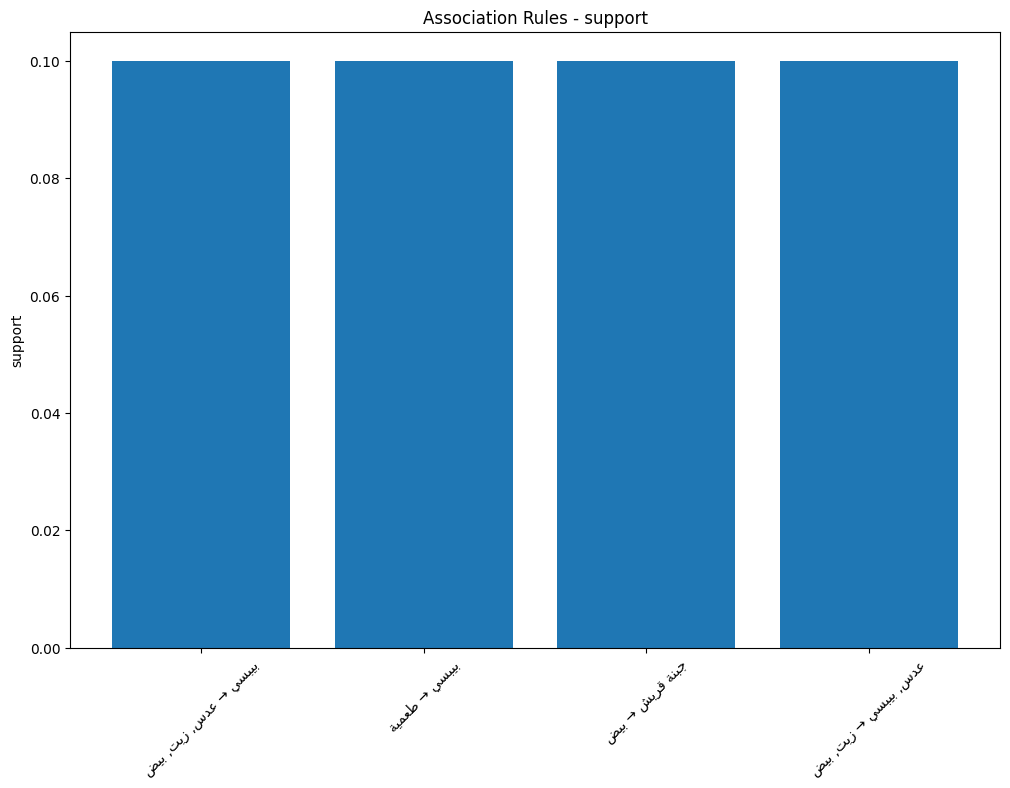

In [89]:
# Function for handling arabic text
def reshape_arabic(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# Combining antecedents and consequents
confidence['rule'] = confidence['antecedents'].head.apply(lambda x: ', '.join(x)) + ' → ' + confidence['consequents'].apply(lambda x: ', '.join(x))

# Apply text reshaping
confidence['rule'] = confidence['rule'].apply(reshape_arabic)

plt.figure(figsize=(12, 8))

x = confidence['rule'].sample(4)
y = confidence['support'].sample(4)

plt.bar(x, y)

plt.xticks(rotation=45)

# Labels and title
plt.ylabel('support')
plt.title('Association Rules - support');